In [4]:
%reset -f
%matplotlib inline
%autosave 300
from matplotlib.pylab import *

Autosaving every 300 seconds


# Cours Méthode Elements finis
Il s'agit d'un outil numérique qui permet d'approcher les solutions de problème de modélisation décrit par des équations aux dérivées partielles. Cet outil numérique est utilisé dans les logiciels numériques de simulation (ANSYS fluent, CATIA, Solidworks, openfoam...)
## Motivation
equation de thermique à l'équilibre. Problème aux limites....(détails tableaux)
## Résolution d'équations différentielles linéaires
### exemple 1
$$
u''(x)+2u'(x)-3u(x)=0
$$
La solution s'écrit
$$
u(x)=C_1 \exp(-3x)+C_2\exp(x).
$$
### exemple 2
$$
u''(x)+2u'(x)+3u(x)=0
$$
La solution fait intervenir des exponentielles complexes (produit d'exponentiel réelle et fonction trigonométrique).
### exemple 3: pendule linéarisé autour de l'équilibre
$$
u''(x)+u(x)=0
$$
Equation caractéristique :
$$
r^2+1=0.
$$
Soit $r_1=i$ et $r_2=-i$.
La solution s'écrit
$$
u(x)=C_1 \exp(ix) +C_2\exp(-ix).
$$
La solution réelle s'écrit 
$$
u(x)=C'_1 \cos(x) +C'_2\sin(x).
$$


## La librairie sympy de Python
Elle va nous permettre de procéder à des calculs de dérivation et d'intégration.

In [12]:
# Introduction au calcul symbolique
import sympy as sy
x,y =sy.symbols('x y ')
phi1=(x-1)*sy.sin(x)

dxphi1=sy.diff(phi1,x)
print(dxphi1)
integ=sy.integrate(phi1,(x,0,y))
print(integ)
print(sy.diff(integ,y))

(x - 1)*cos(x) + sin(x)
-y*cos(y) + sin(y) + cos(y) - 1
y*sin(y) - sin(y)


y*cos(x*y) + exp(x)*sin(y)
x*cos(x*y) + exp(x)*cos(y)
Piecewise((-cos(y)/y + 1/y, (y > -oo) & (y < oo) & Ne(y, 0)), (0, True)) - sin(y) + E*sin(y)


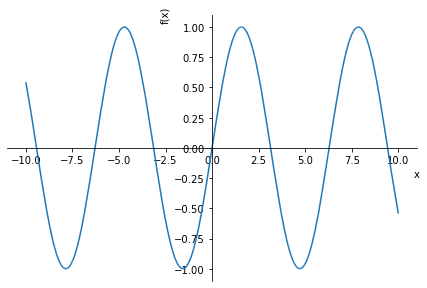

In [17]:
g=sy.sin(x*y)+sy.exp(x)*sy.sin(y)
dgx=sy.diff(g,x)
print(dgx)
dgy=sy.diff(g,y)
print(dgy)
print(sy.integrate(g,(x,0,1)))
h=sy.sin(x)
sy.plot(h)

## Introduction aux différences finies

Avant de résoudre un problème aux limites par méthodes éléments finis, nous allons le résoudre par une méthode plus intuitive, la méthode des différences finies qui consiste à approcher un opérateur de dérivation par des combinaisons d'évaluation de la fonction sur laquelle l'opérateur agit.

Pour cela, nous utilisons l'outil mathématique des développements limités (ou formule de Taylor) que nous rappelons.

### Développements limités

Lorsqu'une fonction et ses dérivées sont continues, nous avons l'approximation:
$$
f(x+h)=f(x)+f'(x)h+\frac {h^2} 2 f''(x)+\frac {h^3} 6 f'''(x)+\cdots +\frac {h^k} {k!} f^{(k)}(x)+O(h^{k+1}).
$$

En changeant les notations, on peut écrire le développement de $f$ en $x$ autour de $x_0$ fixé.
$$
f(x)=f(x_0)+f'(x_0)(x-x_0)+\frac {(x-x_0)^2} 2 f''(x_0)+\frac {(x-x_0)^3} 6 f'''(x_0)+\cdots +\frac {(x-x_0)^k} {k!} f^{(k)}(x_0)+O((x-x_0)^{k+1})
$$
### DF de la dérivée
On rappelle la définition du nombre dérivée $$f^\prime(x_0)=\lim_{h\to 0} \frac {f(x_0+h)-f(x_0)}{h}.$$
- **Exercice:** Vérifier l'erreur commise pour approcher la dérivée de la fonction sinus en $0$ à l'aide de l'approximation $\frac {f(x_0+h)-f(x_0)}{h}$ pour différentes valeurs de $h$ petites ($0.01$, $0.001$, $0.0001$....)

### DF de la dérivée seconde
On procède à l'évaluation de $f(x+h)$, $f(x)$ et $f(x-h)$ pour construire une approximation de $f''(x)$. On rappelle:
$$
f(x+h)=f(x)+f'(x)h+\frac {h^2} 2 f''(x)+\frac {h^3} 6 f'''(x)+\cdots +\frac {h^k} {k!} f^{(k)}(x)+O(h^{k+1}).
$$

On écrit le même développement avec $-h$ à la place de $h$,
$$
f(x-h)=f(x)-f'(x)h+\frac {h^2} 2 f''(x)-\frac {h^3} 6 f'''(x)+O(h^4).
$$
On obtient ainsi par sommation et en retranchant $f(x)$,
$$
f(x+h)-2f(x)+f(x-h)=h^2f''(x)+ O(h^4).
$$
On conclut alors après division par $h^2$:
$$
f''(x)=\frac{f(x+h)-2f(x)+f(x-h)}{h^2}+ O(h^2).
$$
- **Exercice:** Vérifier que l'erreur se comporte bien comme $h^2$...
- **Exercice:** Trouver une formule DF pour approcher la dérivée troisième.

In [24]:
def f(x):
    return sin(x)
def fseconde(x):
    h=1.e-3
    return (f(x+h)-2*f(x)+f(x-h))/(h**2)


def ftroisieme(x):
    h=1.e-3
    return (fseconde(x+h)-fseconde(x-h))/(2*h)
print(ftroisieme(f(0)))

-0.9999997501071445


### Exercice
Soit une fonction $f$ donnée, par exemple $f(x)=\sin(x^2)$.
Nous allons comparer, au voisinage de $1$ (On choisira l'intervalle $[\frac 1 2,\frac 3 2]$, la fonction $f$ ainsi que sa tangente et sa parabole approchante (celle construite sur le développement limité à l'ordre $2$).
 - Construire la fonction "fprime" qui approche la dérivée de $f$ en un point.
 - Construire la fonction "fseconde" qui approche la dérivée seconde de $f$ en un point.
 - Construire les graphes de $f$, de la tangente et de la parabole approchante.
On notera "tang" le tableau de l'évalation de l'ordonnée de la tangente pour les points equirépartis de $\frac 1 2$ à $\frac 3 2$ du tableau "x1=linspace(0.5,1.5,400)".
On notera de même "parab" le tableau de l'évalation de l'ordonnée de la parabole approchante.

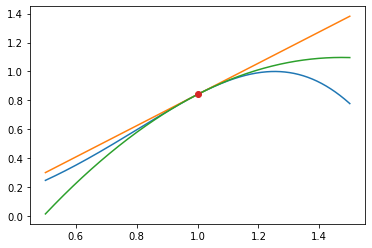

In [26]:
def f(x):
    return sin(x**2)
def fprime(x):
    h=1.e-4
    return (f(x+h)-f(x-h))/(2*h)
def fseconde(x):
    h=1.e-4
    return (f(x+h)-2*f(x)+f(x-h))/(h**2)

x1=linspace(0.5,1.5,400)
fonc=f(x1)
tang=f(1)+(x1-1)*fprime(1)
parab=tang+0.5*(x1-1)**2*fseconde(1)
plot(x1,fonc,x1,tang,x1,parab)
plot([1],[f(1)],'o')

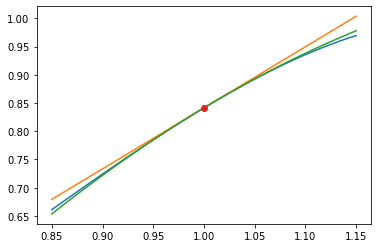

In [20]:
x1=linspace(0.85,1.15,400)
fonc=f(x1)
tang=f(1)+(x1-1)*fprime(1)
parab=tang+0.5*(x1-1)**2*fseconde(1) 
plot(x1,fonc,x1,tang,x1,parab)
plot([1],[f(1)],'o')

## Différences finies 1D
L'objectif ici est de présenter la discrétisation différence finie 1D pour le problème de Dirichlet homogène:
$$
\begin{align}
&-u''(x)=f(x),\quad \forall x\in ]0,1[,\\
&u(0)=u(1)=0.
\end {align}
$$
### Approximation de la dérivée seconde
On rappelle que si $u$ est une fonction $\mathcal C^4$, alors
$$
-u''(x)=\frac {-u(x-h)+2u(x)-u(x+h)}{h^2}+\mathcal O(h^2).
$$
Cette formule, basée sur des évaluations de $u$ pour approcher $u''$ lorsque le réel $h>0$ est petit, va servir d'approximation évaluée en de nombreux points distants de $h$. Il s'en suivra un système linéaire.

On introduit la discrétisation uniforme du segment $]0,1[$ par 
$$
x_i=i h, \quad i=0\cdots N+1,
$$
avec $h=\frac 1 {N+1}$.
Pour $i=1$ à $N$, on va approcher l'équation $-u''(x_i)=f(x_i)$. Pour $i=0$ et $i=N+1$, on va utiliser la condition limite. On note $u_i\sim u(x_i)$ et $f_i=f(x_i)$ satisfaisant 
$$
\begin {align}
&u_0=0\\
&\frac {-u_{0}+2u_1-u_2}{h^2}=f_1\\
&\frac {-u_{1}+2u_2-u_3}{h^2}=f_2\\
&\cdots\\
&\frac {-u_{i-1}+2u_i-u_{i+1}}{h^2}=f_i\\
&\cdots\\
&\frac {-u_{N-1}+2u_N-u_{N+1}}{h^2}=f_ N\\
&u_{N+1}=0.
\end {align}
$$
En éliminant la première et la dernière equation substituées dans la deuxième et avant-dernière equation, il vient le système de $N$ inconnues $U=(u_1,\cdots,u_N)^t$ suivant:
$$
A U=F,\quad F=(f_1,\cdots,f_N)^t,
$$
avec 
$$
A=\frac 1 {h^2}\left (\matrix{&2&-1&0&\cdots&0\\
&-1&2&-1&0&\cdots\\
&0&-1&2&-1&0 \\
&-&-&-&-&-\\
&0&\cdots&0&-1&2}\right )
$$
L'objectif est alors de construire ce système linéaire en python. On utilisera la gestion creuse des matrices à l'aide des outils de la bibliothèque scipy.


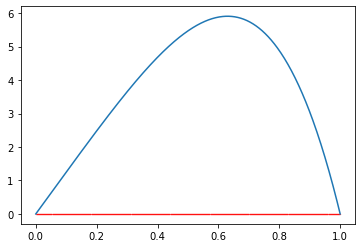

In [10]:
#importation des bibliothèques utiles
from scipy.sparse.linalg import spsolve
from scipy.sparse import spdiags
# le pas h
N=600
h=1/(N+1)
#h=1
# construction du vecteur de discrétisation
x=linspace(h,1-h,N)
x_avec_CL=linspace(0,1,N+2)
#construction de la fonction f de votre choix
f=lambda x : 150*x**2#-100*x
#construction du second membre du systeme
F=f(x)
#construction de la matrice en systeme creux
D0=2/h**2*ones(N)
D1=-1/h**2*ones(N)
A=spdiags(D0,[0],N,N)+spdiags(D1,[1],N,N)+spdiags(D1,[-1],N,N)
#resolution du systeme creux
U=spsolve(A,F)
#Ajout des CL de Dirichlet
U_avec_CL=zeros(N+2)
U_avec_CL[1:N+1]=U
plot(x_avec_CL,U_avec_CL)
#On rajoute les points de discrétisation sur l'axe des abscisses.
scatter(x,0*x,[0.1],'red')
#print(A.toarray())

### Exercices
- Résoudre par la même méthode le problème
$$
\begin{align}
&-u''(x)+u'(x)=f(x),\quad \forall x\in ]0,1[,\\
&u(0)=u(1)=0.
\end {align}
$$
Vous choisirez la fonction $f$ de votre choix.
- Choisir la fonction $f$ de sorte que la solution exacte soit
$u(x)=\sin(x)(x-1)$.
Vous utiliserez un calcul sympy pour trouver $f$.
- Calculer l'erreur maximale en $x$ en fonction de $h$. Vérifier l'erreur de la méthode.

Par rapport à l'équation différentielle précédente, il faut approcher le terme supplémentaire $u'(x)$. On propose la formule centrée différence finie:
$$
u'(x)\sim \frac {-u(x-h)+u(x+h)}{2h}.
$$
Pour $i=1$ à $N$, on va approcher l'équation $-u''(x_i)+u'(x_i)=f(x_i)$. Pour $i=0$ et $i=N+1$, on va utiliser la condition limite. On note $u_i\sim u(x_i)$ et $f_i=f(x_i)$ satisfaisant 
$$
\begin {align}
&u_0=0\\
&\frac {-u_{0}+2u_1-u_2}{h^2}+\frac {-u_{0}+u_2}{2h}=f_1\\
&\frac {-u_{1}+2u_2-u_3}{h^2}+\frac {-u_{1}+u_3}{2h}=f_2\\
&\cdots\\
&\frac {-u_{i-1}+2u_i-u_{i+1}}{h^2}+\frac {-u_{i-1}+u_{i+1}}{2h}=f_i\\
&\cdots\\
&\frac {-u_{N-1}+2u_N-u_{N+1}}{h^2}+\frac {-u_{N-1}+u_{N+1}}{2h}=f_ N\\
&u_{N+1}=0.
\end {align}
$$
En éliminant la première et la dernière equation substituées dans la deuxième et avant-dernière equation, il vient le système de $N$ inconnues $U=(u_1,\cdots,u_N)^t$ suivant:
$$
(A+B) U=F,\quad F=(f_1,\cdots,f_N)^t,
$$
avec 
$$
A=\frac 1 {h^2}\left (\matrix{&2&-1&0&\cdots&0\\
&-1&2&-1&0&\cdots\\
&0&-1&2&-1&0 \\
&-&-&-&-&-\\
&0&\cdots&0&-1&2}\right )
$$
et
$$
B=\frac 1 {2h}\left (\matrix{&0&1&0&\cdots&0\\
&-1&0&1&0&\cdots\\
&0&-1&0&1&0 \\
&-&-&-&-&-\\
&0&\cdots&0&-1&0}\right )
$$
On écrit le code associé: 

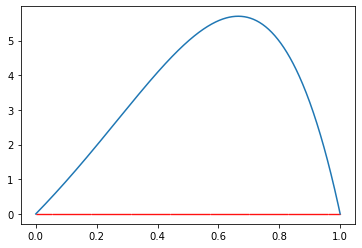

In [82]:
N=600
h=1/(N+1)
#h=1
# construction du vecteur de discrétisation
x=linspace(h,1-h,N)
x_avec_CL=linspace(0,1,N+2)
#construction de la fonction f de votre choix
f=lambda x : 150*x**2#-100*x
#construction du second membre du systeme
F=f(x)
#construction de la matrice en systeme creux
D0=2/h**2*ones(N)
D1=-1/h**2*ones(N)
D1B=-1/(2*h)*ones(N)
A=spdiags(D0,[0],N,N)+spdiags(D1,[1],N,N)+spdiags(D1,[-1],N,N)
A+=spdiags(-D1B,[1],N,N)+spdiags(D1B,[-1],N,N)
A=A.tocsr()
#resolution du systeme creux
U=spsolve(A,F)
#Ajout des CL de Dirichlet
U_avec_CL=zeros(N+2)
U_avec_CL[1:N+1]=U
plot(x_avec_CL,U_avec_CL)
#On rajoute les points de discrétisation sur l'axe des abscisses.
scatter(x,0*x,[0.1],'red')

l'ordre de la méthode en h est : 1.9938821295739257


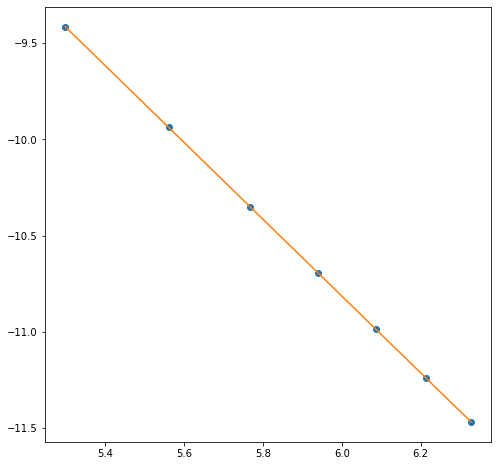

In [84]:
def f(x):
    return sin(x)
def erreur_DF1D_dir(N):
    L=2*pi
    h=L/(N+1)
    x=linspace(h,L-h,N)
    F=f(x)
#construction de la matrice en systeme creux
    D0=2/h**2*ones(N)
    D1=-1/h**2*ones(N)
    A=spdiags(D0,[0],N,N)+spdiags(D1,[1],N,N)+spdiags(D1,[-1],N,N)
#resolution du systeme creux
    U=spsolve(A,F)
    erreur=max(abs(U-sin(x)))
    return erreur
errtab=[]
Ntab=[]
for N in range(200,600,60):
    Ntab.append(N)
    errtab.append(erreur_DF1D_dir(N))
figure(figsize=(8,8))
plot(log(Ntab),log(errtab),'o')
[a,b]=polyfit(log(Ntab),log(errtab), 1)
plot(log(Ntab),a*log(Ntab)+b)
print("l'ordre de la méthode en h est :",-a)

## Différences finies 2D
L'objectif ici est de présenter la discrétisation différence finie 2D pour le problème de Dirichlet homogène posé sur un rectangle:
$$
\begin{align}
-\Delta u(x,y)=-\partial_x^2 u(x,y)- \partial_y^2 u(x,y) =f(x,y),&\quad \forall (x,y)\in \Omega=]0,L[\times]0,H[,\\
u(x,y)=0,& \quad \forall (x,y)\in \partial \Omega.
\end {align}
$$
### Approximation du Laplacien
On utilise la même approximation que dans le cas 1D pour la direction $x$ et pour la direction $y$,  si $u$ est une fonction $\mathcal C^4$, alors
$$
-\Delta u(x,y)=\frac {-u(x-l,y)+2u(x,y)-u(x+l,y)}{l^2}+\frac {-u(x,y-h)+2u(x,y)-u(x,y+h)}{h^2}+\mathcal O(l^2+h^2).
$$
Cette formule, basée sur des évaluations de $u$ sur une grille Cartésienne de pas $l$ dans la direction $x$ et de pas $h$ dans la direction $y$, va servir d'approximation de l'équation. Il s'en suivra un système linéaire dont le nombre d'inconnues est le nombre de points de grille internes au domaine $\Omega$.

In [88]:
from scipy.sparse.linalg import spsolve
from scipy.sparse import lil_matrix, csr_matrix

def DF2D_dir(N,M,L,H):
    l=L/(N+1)
    h=H/(M+1)
    #print(l,h)
#remplissage de la matrice
#le format  LIL (list de list) permet de remplir 
#les coefficients d'une matrice creuse en accedant à sa position 
#ligne colonne
#A est ici initialisé à la matrice nulle de la taille considérée
    A =lil_matrix((N*M, N*M))
    k=0
    for j in range(M):
        for i in range(N):
            A[k,k]=2/l**2+2/h**2
            if i<N-1:
                A[k,k+1]=-1/l**2
            if i>0:
                A[k,k-1]=-1/l**2
            if j<M-1:
                A[k,k+N]=-1/h**2
            if j>0:
                A[k,k-N]=-1/h**2
            k+=1
    SM=-0.1*ones(N*M)
    SM[0:int(N*M*3/4)]=0.
    A=A.tocsr()
    U=spsolve(A,SM)
    return U


In [98]:
def visu(U,N,M,L,H,var):
    uu=reshape(U,(M,N))
    from mpl_toolkits import mplot3d
    fig = plt.figure(figsize=(12,12))
    ax = plt.axes(projection='3d')
    x=linspace(0,L,N)
    y=linspace(0,H,M)
    X, Y = meshgrid(x,y)
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, uu, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel(var);
    ax.view_init(25, 35)
    return None

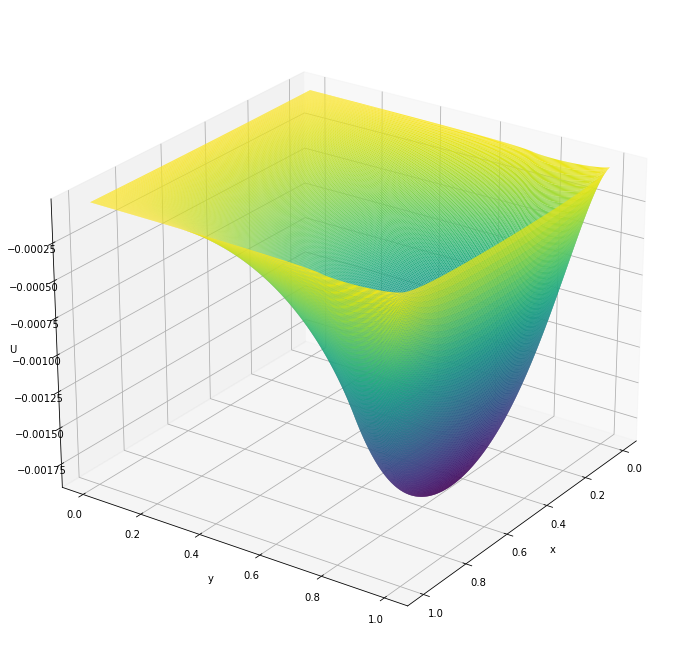

In [99]:
L=1
H=1
N=320
M=299
U=DF2D_dir(N,M,L,H)
visu(U,N,M,L,H,'U')

## Validation du problème 2D
On va construire une solution analytique du problème de Dirichlet 2D posé sur un rectangle.
On va se donner une expression analytique de $u(x,y)$ qui satisfait les conditions de Dirichlet et on va calculer le terme source correspondant.

On choisit ici un exemple non trivial (on évitera les polynômes de degré inférieur à 3): $$u(x,y)=sin(x^2)(x-L)^2sin(y-H)ycos(xy).$$
On utilise sympy pour proposer l'expression du terme source $f(x,y)$.


In [95]:
# Introduction au calcul symbolique
import sympy as sy
x,y,L,H =sy.symbols('x y L H')
u=sy.sin(x**2)*(x-L)**2*sy.sin(y-H)*y*sy.cos(x*y)

dxu=sy.diff(u,x)
d2xu=sy.diff(dxu,x)
dyu=sy.diff(u,y)
d2yu=sy.diff(dyu,y)
print(-d2xu-d2yu)

-5*x**2*y*(-L + x)**2*sin(x**2)*sin(H - y)*cos(x*y) - 4*x*y**2*(-L + x)**2*sin(x*y)*sin(H - y)*cos(x**2) + 4*x*y*(-2*L + 2*x)*sin(H - y)*cos(x**2)*cos(x*y) + 2*x*y*(-L + x)**2*sin(x**2)*sin(x*y)*cos(H - y) - 2*x*(-L + x)**2*sin(x**2)*sin(x*y)*sin(H - y) - y**3*(-L + x)**2*sin(x**2)*sin(H - y)*cos(x*y) - 2*y**2*(-2*L + 2*x)*sin(x**2)*sin(x*y)*sin(H - y) - y*(-L + x)**2*sin(x**2)*sin(H - y)*cos(x*y) + 2*y*(-L + x)**2*sin(H - y)*cos(x**2)*cos(x*y) + 2*y*sin(x**2)*sin(H - y)*cos(x*y) - 2*(-L + x)**2*sin(x**2)*cos(x*y)*cos(H - y)


On va alors construire la fonction $f$ qui représente le terme source et calculer l'erreur entre la solution exacte et approchée en fonction de $N$ le paramètre de discrétisation. On chosira $M=N$ pour n'avoir qu'un paramètre numérique.

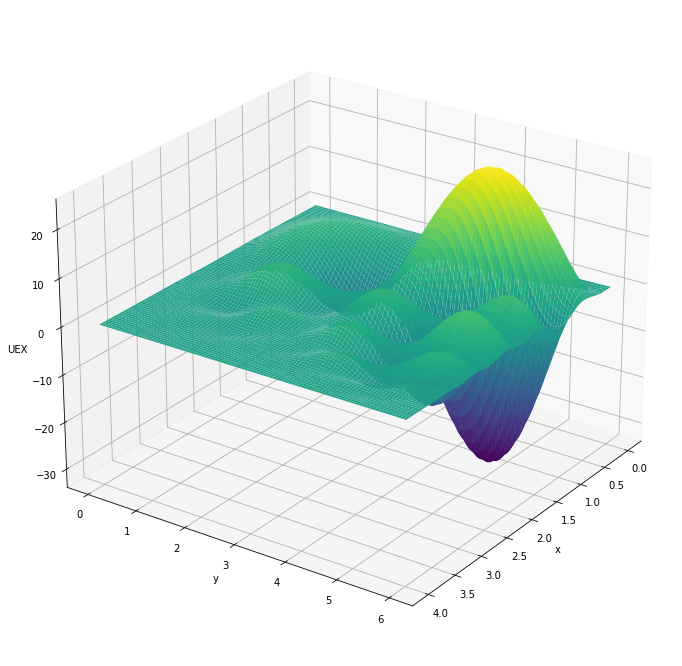

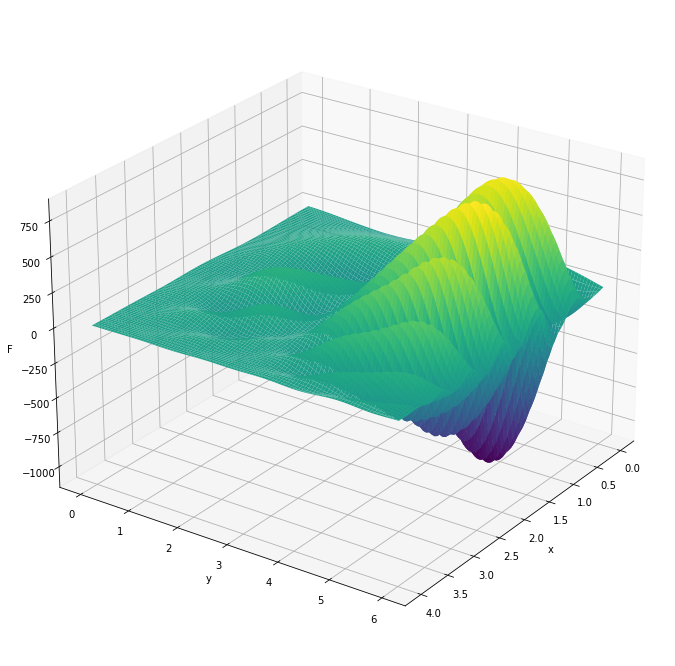

In [114]:
def uexacte(x,y,L,H):
    return sin(x**2)*(x-L)**2*sin(y-H)*y*cos(x*y)
def f(x,y,L,H):
    return -5*x**2*y*(-L + x)**2*sin(x**2)*sin(H - y)*cos(x*y) - 4*x*y**2*(-L + x)**2*sin(x*y)*sin(H - y)*cos(x**2) + 4*x*y*(-2*L + 2*x)*sin(H - y)*cos(x**2)*cos(x*y) + 2*x*y*(-L + x)**2*sin(x**2)*sin(x*y)*cos(H - y) - 2*x*(-L + x)**2*sin(x**2)*sin(x*y)*sin(H - y) - y**3*(-L + x)**2*sin(x**2)*sin(H - y)*cos(x*y) - 2*y**2*(-2*L + 2*x)*sin(x**2)*sin(x*y)*sin(H - y) - y*(-L + x)**2*sin(x**2)*sin(H - y)*cos(x*y) + 2*y*(-L + x)**2*sin(H - y)*cos(x**2)*cos(x*y) + 2*y*sin(x**2)*sin(H - y)*cos(x*y) - 2*(-L + x)**2*sin(x**2)*cos(x*y)*cos(H - y)


L=4
H=6
N=100
M=100
h=L/(N+1)
l=H/(M+1)
x=linspace(l,L-l,N)
y=linspace(h,H-h,M)
XT,YT=meshgrid(x,y)
X=reshape(XT,N*M)
Y=reshape(YT,N*M)
UEX=uexacte(X,Y,L,H)
F=f(X,Y,L,H)
visu(UEX,N,M,L,H,'UEX')
visu(F,N,M,L,H,'F')

In [118]:
def ERR_DF2D_dir(N,M,L,H):
    l=L/(N+1)
    h=H/(M+1)
    A =lil_matrix((N*M, N*M))
    k=0
    for j in range(M):
        for i in range(N):
            A[k,k]=2/l**2+2/h**2
            if i<N-1:
                A[k,k+1]=-1/l**2
            if i>0:
                A[k,k-1]=-1/l**2
            if j<M-1:
                A[k,k+N]=-1/h**2
            if j>0:
                A[k,k-N]=-1/h**2
            k+=1
    x=linspace(l,L-l,N)
    y=linspace(h,H-h,M)
    XT,YT=meshgrid(x,y)
    X=reshape(XT,N*M)
    Y=reshape(YT,N*M)
    SM=f(X,Y,L,H)
    A=A.tocsr()
    U=spsolve(A,SM)
    UEX=uexacte(X,Y,L,H)
    return max(abs(U-UEX))/max(abs(U))
print('erreur relative maximale sur la grille',ERR_DF2D_dir(100,150,L,H))
print('erreur relative maximale sur la grille',ERR_DF2D_dir(200,300,L,H))

erreur relative maximale sur la grille 0.004077362720044639
erreur relative maximale sur la grille 0.0010312910860496652


### Exercice
#### Identifier les régions de fort gradient
#### Ajout de transport à l'EDP
Résoudre le problème avec le terme additionnel de transport
$$
\begin{align}
-\Delta u(x,y)  +V(x,y)\cdot \nabla u(x,y)=f(x,y),&\quad \forall (x,y)\in \Omega=]0,L[\times]0,H[,\\
u(x,y)=0,& \quad \forall (x,y)\in \partial \Omega.
\end {align}
$$
Ici $V$ est un champ de vitesse donné qu'on pourra chosir comme un champ tournant.

## Méthode de Galerkine

On va visiter une nouvelle façon d'approcher des equations aux dérivées partielles. On va chercher la fonction inconnue dans un espace de dimension finie qui satisfait une version affaiblie de l'equation.

### Espace vectoriel de fonction
On rappelle la notion d'espace vectoriel, caractérisé par une base (une famille libre et génératrice d'éléments de cet espace.
Exemple:
$$
\mathbb P_n=\{p \text{ polynôme de degré au plus } n    \}=\text{Vect}\{1,x,x^2,\cdots, x^n   \}
$$
La dimension de l'espace est le nombre d'éléments d'une base ($n+1$ pour l'exemple proposé).

Un élément de l'espace est entièrement caractérisé par ses coefficients (réels ou complexes selon que l'on considère un $\mathbb R$ ou $\mathbb C$ espace vectoriel) dans la base.

Si $v\in V=\text{Vect}\{\Phi_1,\Phi_2,\cdots, \Phi_n   \}$ alors il existe $(\alpha_i)_{1\le i\le n}\in \mathbb R^n$ tel que:
$$
v=\sum_{i=1}^n \alpha_i \Phi_i.
$$
### Formulation faible
Lorsqu'on dispose d'une EDP, comme par exemple le problème de Dirichlet:
$$
\begin{align}
\text{Eq}(u)=-\Delta u(x,y)  -f(x,y)=0,&\quad \forall (x,y)\in \Omega=]0,L[\times]0,H[,\\
u(x,y)=0,& \quad \forall (x,y)\in \partial \Omega,
\end {align}
$$
Une formulation, dite faible, de ce problème s'écrit comme
$$\begin{align}
\forall v \in V, \text{ trouver }u\in V \text { tel que }\\
\int_{\Omega} \text{Eq}(u)(x,y) v(x,y)\,dxdy=0,
\end {align}
$$
où l'espace $V$ est choisit de manière pertinente pour y trouver la solution de l'EDP. C'est depuis cette formulation que l'on cherche une solution approchée en réduisant l'espace $V$ à un espace pertinent de dimension finie.
### Solution de Galerkine
Une solution approchée par la méthode de Galerkine consiste à résoudre la formulation suivante:
$$\begin{align}
\forall v \in V_N, \text{ trouver }u_N\in V_N \text { tel que }\\
\int_{\Omega} \text{Eq}(u_N)(x,y) v(x,y)\,dxdy=0,
\end {align}
$$
où $V_N$ est un espace de fonction de dimension $N$ bien choisi (en particulier vis à vis des conditions limite.
Il suffira alors d'écrire le système réduit à $N$ équations scalaires obtenu en choisissant $v=\Phi_i$ pour $1\le i\le N$ où
$$
V_N=\text{Vect}\{\Phi_1,\Phi_2,\cdots, \Phi_N   \}.$$
On aura alors $N$ éqiations pour $N$ inconnues que sont les coefficients de $u_N$ dans la base $(\Phi_i)_{1\le i \le N }$.

### Une base de fonctions trigonométriques
On pourra choisir comme base $(\Phi_i)_{1\le i \le N }$ des fonctions trigonométriques bien choisies vis à vis des conditions limites posées sur la solution qu'on cherche. Pour décomposer une fonction dans une telle base, on aura recours à une transformée de Fourier discrète.
On donne un exemple pour le problème de Dirichlet 1D:
on cherche $u_N=\sum_{k=0}^{N-1} \alpha_k \Phi_k\in V_N$ tel que
$$
\int_{\Omega=]0,1[} \text{Eq}(u_N)(x)v(x)\,dx=\int_0^1 {\bf u}_N'(x) v'(x)\,dx-\int_0^1 f(x)v(x)\,dx,~\forall v \in V_N. 
$$
De façon générale pour les méthodes de Galerkine, le système linéaire s'écrit alors:
$$
\sum_{k=0}^{N-1} \int_0^1\phi'_k(x) \phi'_i(x)\, dx\alpha_k=\int_0^1 f(x)\phi_i(x)\,dx,~\forall 0\le i<N.
$$
La matrice de ce système linéaire (coefficient $\int_0^1\phi'_k(x) \phi'_i(x)\, dx$ en ligne $i$ colonne $k$) est diagonale grâce au choix de fonctions trigonométriques. On va observer ces propriétés sur les exemples qui suivent.
#### fonction trigonométrique périodique
L'exemple suivant permet de comprendre la normalisation choisie des fonctions de base réelles $L-$périodique $\phi_0=\frac 1 {N}$, $\phi_1(x)=\frac 1 {N} \cos(2\pi\frac x L)$, $\phi_2(x)=-\frac 2 {N} \sin(2\pi\frac x L)$, $\cdots$, $\phi_{N-2}(x)=-\frac 2 {N} \sin(2\pi\frac{N-2}2\frac x L)$, $\phi_{N-1}(x)=\frac 1 {2N} \cos(2\pi\frac N 2\frac x L)$, associée à la fonction "rfft" de scipy.

Fourier inverse de fourier=identité (erreur machine près): 2.220446049250313e-16


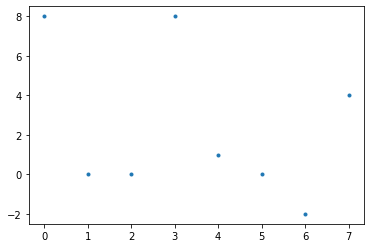

In [130]:
from scipy.fftpack import rfft, irfft
N=8
L=10
dx=L/N
x = linspace(0.0,L-dx,N)
U=1+2*cos(2*pi*2*x/L)-2/N*sin(2*pi*2*x/L)+0.5*sin(2*pi*(N/2-1)*x/L)+0.5*cos(2*pi*(N/2)*x/L)

plot(arange(0,N),rfft(U),'.');
print('Fourier inverse de fourier=identité (erreur machine près):',max(abs(irfft(rfft(U))-U)))

#### Transformée rapide en cosinus

Pour choisir une base de fonction réelle satisfaisant une dérivée nulle aux extrémités, une base en cosinus est adaptée. On remarque que la grille de pas $dx$ est placée au milieu des segments $N$ segments de longueur $dx$ qui couvrent l'intervalle $[0,L]$. Ansi on évalue la fonction en $\frac {dx} 2$ puis par pas de $dx$  avant d'en calculer la transformée de Fourier "dct". La base construite est $\phi_0=\frac 1 {2N}$, $\phi_1(x)=\frac 1 {N} \cos(\pi\frac x L)$, $\phi_2(x)=\frac 1 {N} \cos(\pi 2\frac x L)$, $\cdots$, $\phi_{N-2}(x)=\frac 1 {N} \cos(\pi(N-2)\frac x L)$, $\phi_{N-1}(x)=\frac 1 {N} \cos(\pi(N-1)\frac x L)$.

Contrairement à la fonction "irfft" qui est bien la transformée inverse de la fonction "rfft", la fonction "idct" doit être renormalisée par $\frac 1 {2N}$.

Fourier inverse de fourier=identité 1.3322676295501878e-15


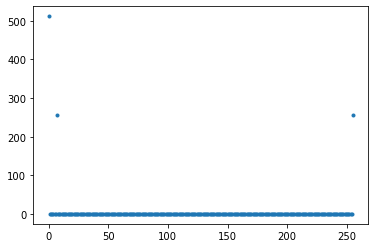

In [138]:
from scipy.fftpack import dct, idct
N=2**8
L=10
dx=L/N
x = linspace(dx/2,L-dx/2,N)
U=1+1*cos(pi*7*x/L)+1*cos(pi*(N-1)*x/L)
plot(arange(0,N),dct(U,2),'.');
print('Fourier inverse de fourier=identité',max(abs(0.5/N*idct(dct(U))-U)))

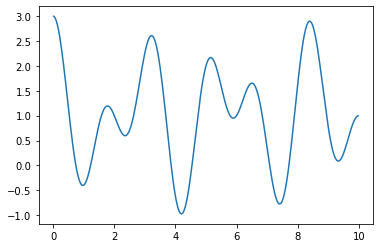

In [141]:
x = linspace(dx/2,L-dx/2,N)
U=1+1*cos(pi*7*x/L)+1*cos(pi*(12)*x/L)
plot(x,U)

#### Transformée rapide en sinus

Pour choisir une base de fonction réelle satisfaisant une condition de Dirichlet homogène aux extrémités, une base en sinus est adaptée. On remarque que la grille de pas $dx$ est placée au milieu des segments $N$ segments de longueur $dx$ qui couvrent l'intervalle $[0,L]$. Ansi on évalue la fonction en $\frac {dx} 2$ puis par pas de $dx$  avant d'en calculer la transformée de Fourier "dst". La base construite est $\phi_0=\frac 1 {N} \sin(\pi\frac x L)$, $\phi_1(x)=\frac 1 {N} \sin(\pi 2\frac x L)$, $\phi_2(x)=\frac 1 {N} \sin(\pi 3\frac x L)$, $\cdots$, $\phi_{N-2}(x)=\frac 1 {N} \sin(\pi(N-1)\frac x L)$, $\phi_{N-1}(x)=\frac 1 {2N} \sin(\pi N\frac x L)$.

Fourier inverse de fourier=identité 1.3322676295501878e-15


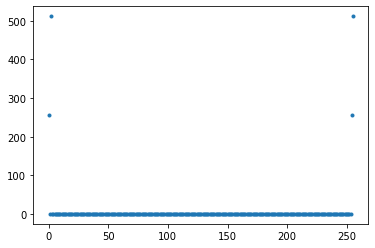

In [132]:
from scipy.fftpack import dst, idst
N=2**8
L=10
dx=L/N
x = linspace(dx/2,L-dx/2,N)
U=1*sin(pi*1*x/L)+2*sin(pi*3*x/L)+1*sin(pi*(N-1)*x/L)+1*sin(pi*(N)*x/L)
plot(arange(0,N),dst(U),'.');
print('Fourier inverse de fourier=identité',max(abs(0.5/N*idst(dst(U))-U)))

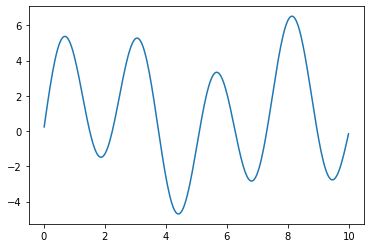

In [137]:
U=1*sin(pi*1*x/L)+2*sin(pi*3*x/L)+4*sin(pi*8*x/L)
plot(x,U)
#plot(arange(0,N),dst(U),'.');

#### Problème de Dirichlet 1D
On va résoudre par décomposition dans une base adaptée de fonction trigonométrique le problème de Dirichlet classique:
$$
\begin {cases}
-u''(x)=1, ~\forall 0<x<2,\\
u(0)=u(2)=0.
\end {cases}
$$
La solution de ce problème est trivialement $u(x)=\frac x 2 (2-x)$.

simu time 0.0017058849334716797
20000 9.4682914631842e-10


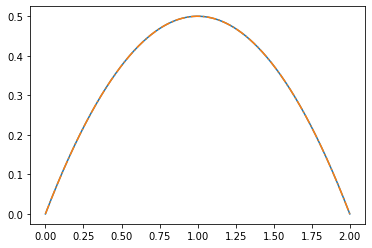

In [146]:
from scipy.fftpack import dst, idst
import time
N=20000
L=2
dx=L/N
x = linspace(dx/2,L-dx/2,N)
f=ones(N)

start = time.time()
U=dst(f)
k2=arange(1,N+1)
k2=k2**2*(pi/L)**2
U=U/k2
U=0.5*idst(U)/N
print('simu time',time.time()-start)
plot(x,U);
uex=x*(L-x)*0.5
plot(x,uex,'-.')
print(N,max(abs(uex-U))/max(abs(uex)))

On propose ici uncalcul du problème de Dirichlet 1D suivant:
$$
\begin {cases}
-u''(x)+u(x)=1, ~\forall 0<x<2,\\
u(0)=u(2)=0.
\end {cases}
$$


simu time 0.002089977264404297


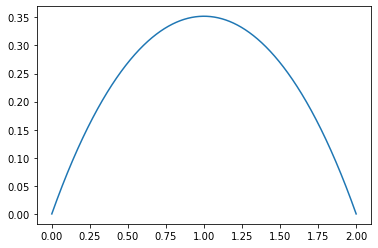

In [148]:
from scipy.fftpack import dst, idst
import time
N=20000
L=2
dx=L/N
x = linspace(dx/2,L-dx/2,N)
f=ones(N)#sin(pi*1.5*x/L)

start = time.time()
U=dst(f)
k2=arange(1,N+1)
k2=k2**2*(pi/L)**2+1
U=U/k2
U=0.5*idst(U)/N
print('simu time',time.time()-start)
plot(x,U);


On change les paramètres du problème, on résoud le même exercice:
$$
\begin {cases}
-2u''(x)+3u(x)=x^2, ~\forall 0<x<5,\\
u(0)=u(2)=0.
\end {cases}
$$


simu time 0.0022950172424316406


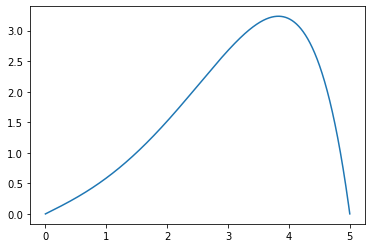

In [149]:
from scipy.fftpack import dst, idst
import time
N=20000
L=5
dx=L/N
x = linspace(dx/2,L-dx/2,N)
f=x**2#sin(pi*1.5*x/L)

start = time.time()
U=dst(f)
k2=arange(1,N+1)
k2=2*k2**2*(pi/L)**2+3
U=U/k2
U=0.5*idst(U)/N
print('simu time',time.time()-start)
plot(x,U);

#### Problème de Dirichlet 2D
On reprend le problème de Dirichlet 2D sur un rectangle, déjà résolu par la méthode des différences finies.
L'extension est naturelle à l'aide des fonctions trigonométriques produit des fonctions trigonométriques écrites pour la direction $x$ et la direction $y$.

grille 300 400 temps simu fft 0.005075931549072266


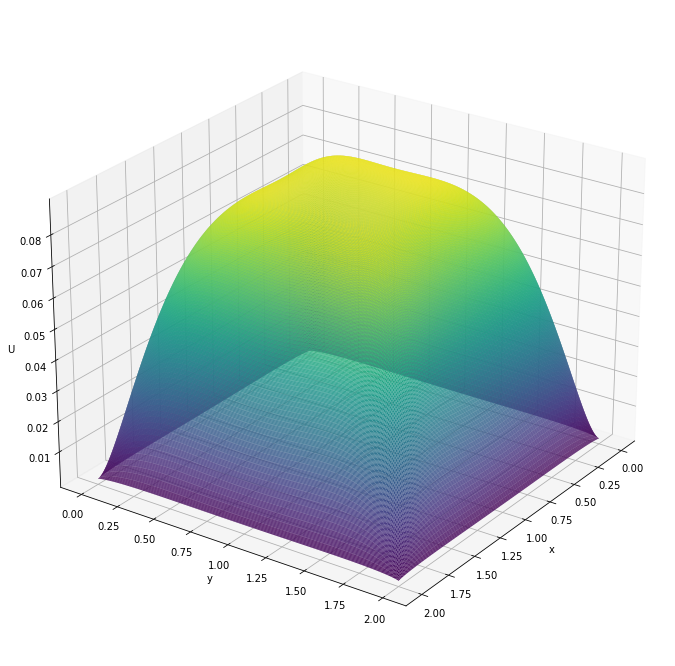

In [128]:
from scipy.fftpack import dstn, idstn
N=300#2**10
M=400#2**10
L=2
H=2
dx=L/N
dy=H/M

x = linspace(dx/2,L-dx/2,N)
y = linspace(dy/2,H-dy/2,M)
X, Y = meshgrid(x,y)
f=(X-0.5*L)**2+(Y-0.5*H)**2
#f=(4*pi**2/L**2+9*pi**2/H**2)*cos(2*pi*X/L)*cos(3*pi*Y/H)
f=f
start=time.time()
U=dstn(f)
Ti,Tj=meshgrid(range(1,N+1),range(1,M+1))
U=U/(pi**2*Ti**2/L**2+pi**2*Tj**2/H**2)
U=0.25*idstn(U)/(N*M)

print('grille',N,M,'temps simu fft',time.time()-start)
start=time.time()
visu(U,N,M,L,H,'U')

### Exercice

#### Validation
Reprendre la vérification de la convergence faite par différence finie pour le problème de Dirichlet 2D. Etablir l'ordre de convergence.
### Problème de Neumann 1D
Trouver la solution numérique par décomposition dans une base de fonctions trigonométriques adaptée pour le problème de Neumann suivant:
$$
\begin {align}
&-u''(x)+2u(x)=x^2, ~\forall ~0<x<3,\\
&u'(0)=u'(3)=0.
\end {align}
$$
### Problème de Laplace 1D périodique
Trouver la solution numérique par décomposition dans une base de fonctions trigonométriques adaptée pour le problème de Neumann suivant:
$$
\begin {align}
&-u''(x)+2u(x)=x^2, ~\forall ~0<x<3,\\
&u(0)=u(3),~u'(0)=u'(3) \text{ (solution périodique)}.
\end {align}
$$
### Calcul symbolique
Vérifier que les fonction $\Phi_2$ et $\Phi_9$ sont orthogonales pour le produit scalaire des fonctions de $[0,L]$ où
$$
\Phi_k(x)=\cos(\pi k \frac x L).
$$

simu time 0.022511720657348633


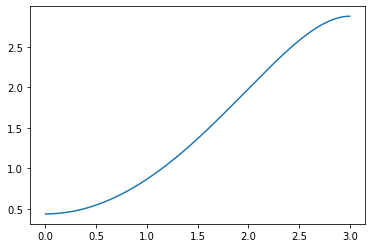

In [153]:
from scipy.fftpack import dct, idct
import time
N=20000
L=3
dx=L/N
x = linspace(dx/2,L-dx/2,N)
f=x**2#sin(pi*1.5*x/L)

start = time.time()
fchapeau=dct(f)
k=arange(0,N)
k2=k**2*(pi/L)**2+2
Uchapeau=fchapeau/k2
U=0.5*idct(Uchapeau)/N
print('simu time',time.time()-start)
plot(x,U);

In [154]:
import sympy as sy
x,L =sy.symbols('x L ')
uEx=x**2*(x-L)**2+2
du=sy.diff(uEx,x)
d2u=sy.diff(du,x)
print(-d2u+2*uEx)

2*x**2*(-L + x)**2 - 2*x**2 - 4*x*(-2*L + 2*x) - 2*(-L + x)**2 + 4


0.0009671786535996318
9.808927430299264e-06
l'ordre de la méthode en h est : 1.8143957342305288


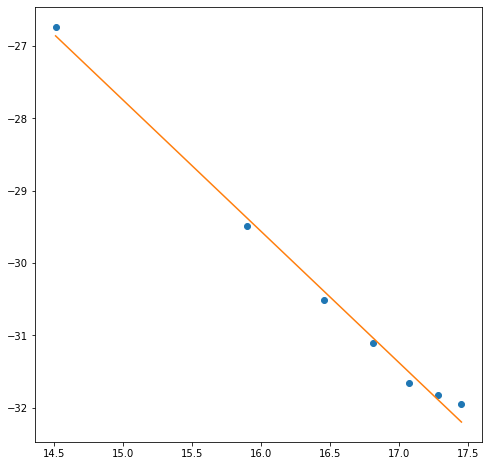

In [168]:
# verification de la solution
# on choisit uex(x)=x**2*(x-L)**2+2
def uex(x,L):
    return x**2*(x-L)**2+2
def f(x,L):
    return 2*x**2*(-L + x)**2 - 2*x**2 - 4*x*(-2*L + 2*x) - 2*(-L + x)**2 + 4

def err(N,L):
    dx=L/N
    x = linspace(dx/2,L-dx/2,N)
    fchapeau=dct(f(x,L))
    k=arange(0,N)
    k2=k**2*(pi/L)**2+2
    Uchapeau=fchapeau/k2
    U=0.5*idct(Uchapeau)/N
    return max(abs(U-uex(x,L)))
print(err(100,3))
print(err(1000,3))

errtab=[]
Ntab=[]
for N in range(2000000,40000000,6000000):
    Ntab.append(N)
    errtab.append(err(N,3))
figure(figsize=(8,8))
plot(log(Ntab),log(errtab),'o')
[a,b]=polyfit(log(Ntab),log(errtab), 1)
plot(log(Ntab),a*log(Ntab)+b)
print("l'ordre de la méthode en h est :",-a)

In [169]:
print(exp(-32))

1.2664165549094176e-14


In [151]:
import sympy as sy
x,L =sy.symbols('x L ')
phi2=sy.cos(sy.pi*2*x/L)
phi9=sy.cos(sy.pi*9*x/L)

integ=sy.integrate(phi2*phi9,(x,0,L))
print(integ)

0


In [152]:
#calcul approché en discret
L=6
N=200
dx=L/N
x=linspace(dx/2,L-dx/2,200)
phi2=cos(pi*2*x/L)
phi9=cos(pi*9*x/L)
print(phi2@phi9)

3.1086244689504383e-15


## Méthode élément fini
On va constuire une méthode de Galerkine consttruite sur un espace d'approximation $V_N$ constitué de fonction affine par morceaux.

On cherche à approcher le problème,
$$
\begin {align}
&-u''(x)+u(x)=f(x), \quad x\in ]0,L[,\\
&u'(0)=-b_0,\\
&u'(L)=b_1.
\end {align}
$$
où la fonction $f$ est donnée et les constantes $b_0$ et $b_1$ sont quelconques fixées. La formulation faible s'écrit pour un espace $V$ qui assure que les intégrales suivantes ont un sens
$$
\left (\mathcal V\right ) \begin {cases}
\text{Trouver } u\in V\text{ tel que }\forall v\in V\\
\int_0^L u'(x)v'(x)\,dx+\int_0^L u(x)v(x)\,dx=\int_0^L f(x)v(x)\,dx+b_0v(0)+b_1v(L).
\end {cases}
$$
On notera $a(u,v)$ l'expression de la forme bilinéaire intervenant dans le membre de gauche de $\left (\mathcal V\right )$ et on notera $l(v)$ la forme linéaire intervenant dans le membre de droite de $\left (\mathcal V\right )$.
### Formulation faible approchée
On cherche à résoudre le problème approché en dimension finie,
$$
\left (\mathcal V_N\right ) \begin {cases}
\text{Trouver } u_N\in V_N\text{ tel que }\forall v\in V_N\\
\int_0^L u_N'(x)v'(x)\,dx+\int_0^L u_N(x)v(x)\,dx=\int_0^L f(x)v(x)\,dx+b_0v(0)+b_1v(L),
\end {cases}
$$
où $V_N$ est de dimension finie et défini par 
$$
V_N=\{ v\in \mathcal C^0(]0,L[)\text{ tel que }v_{|[x_i,x_{i+1}]  }   \in \mathbb P_1,~\forall 0\le i< N-1\},
$$
avec $x_i=ih$ où $h$ est le pas de la subdivision uniforme de $[0,L]$, soit $h=\frac L {N-1}$.
### Base de l'espace d'approximation
On construit une base de $V_N$ à l'aide des fonctions chapeaux suivantes $\Phi_i$ pour $0\le i<N$,
$$
\begin {cases}
\Phi_i(x)=\frac {x-x_{i-1}} h \text { si }x_{i-1}\le x\le x_{i},\\
\Phi_i(x)=\frac {-x+x_{i+1}} h \text { si }x_{i}\le x\le x_{i+1},\\
\Phi_i(x)=0\text { sinon }.
\end {cases}
$$
On vérifie aisément que $\{\Phi_i \}_{0\le i< N}$ forme une famille libre et génératrice de $V_N$:
$$
\forall v\in V_N,\quad v=\sum_{i=0}^{N-1}v(x_i)\Phi_i.
$$
### Système linéaire associé à $\left (\mathcal V_N\right )$
On cherche $u_N$ qui se décompose sur la base $\{\Phi_i \}_{0\le i< N}$ de dimension $N$,
$$
u_N(x)=\sum_{i=0}^{N-1}\alpha_i\Phi_i(x),\quad \forall x\in [0,L].
$$
On notera que les inconnues $\alpha_i$ (coefficients scalaires dans la base) satisfont $\alpha_i=u_N(x_i)$, ce qui sera bien pratique pour visualiser la solution sans avoir à reconstruire $u_N$.

Plutôt que de vérifier $\left (\mathcal V_N\right )$ pour tout $v\in V_N$, il suffit de vérifier la formulation variationelle pour tout $\Phi_i$, $0\le i<N$. On a ainsi $N$ équations scalaires pour $N$ inconnues. Soit le système matricielle,
$$
AU=F,\text{ avec }U=(\alpha_0,\cdot,\alpha_{N-1})^t, ~F=(l(\Phi_0),\cdot,l(\Phi_{N-1}))^t, \text{ et }A_{ij}=a(\Phi_j,\Phi_i).
$$
### Assemblage de la matrice
Dans le cas présent, il est facile d'identifier chacun des coefficients du système en remarquant que la matrice est tridiagonale compte tenu du support des fonctions de base qui s'interesctent seulement avec la fonction de base précédente et suivante. 
Il suffit alors de calculer $a(\Phi_i,\Phi_i)$, $a(\Phi_i,\Phi_{i-1})$ et $a(\Phi_i,\Phi_{i+1})$ en traitant à part $i=0$ et $i=N-1$.

Néanmoins, dans un soucis de généralisation, nous allons présenter une méthode qui s'appliquera tout aussi simplement en dimension supérieure. Cette méthode consiste à construire une matrice dite élémentaire qui évalue le calcul intégral de la formulation faible sur un élément fini et l'assemblage de la matrice globale $A$ se faisant alors par somme des contributions venant de chaque élément.

On construit la matrice élémentaire
$$
el1=\left (\begin {matrix}
\int_0^h \varphi_1'(x)\varphi_1'(x)\, dx &\int_0^h\varphi_1'(x)\varphi_2'(x)\, dx\\
\int_0^h \varphi_2'(x)\varphi_1'(x)\, dx &\int_0^h\varphi_2'(x)\varphi_2'(x)\, dx,\\
\end {matrix}\right )
$$
et
$$
el2=\left (\begin {matrix}
\int_0^h \varphi_1(x)\varphi_1(x)\, dx &\int_0^h\varphi_1(x)\varphi_2(x)\, dx\\
\int_0^h \varphi_2(x)\varphi_1(x)\, dx &\int_0^h\varphi_2(x)\varphi_2(x)\, dx,\\
\end {matrix}\right )
$$
où, quitte à translater l'intervalle de $x_k$, $\varphi_1$ est la restriction de $\Phi_{k}$ à $[x_k,x_{k+1}]$ et $\varphi_2$ est la restriction de $\Phi_{k+1}$ à $[x_k,x_{k+1}]$. Sur $[0,h]$, on a 
$$
 \varphi_1(x)=\frac {h-x}{h}, \quad \varphi_2(x)=\frac {x}{h}.
$$
Ainsi,
$$
el1=\frac 1 {h}\left (\begin {matrix}
1 &-1\\
-1&1\\
\end {matrix}\right ).
$$
#### Exercice
A l'aide de la librairie Sympy, calculer les coefficients de la matrice $el2$.

In [174]:
import sympy as sy
x,h =sy.symbols("x h")

phi1=1-x/h
phi2=x/h
el11=sy.integrate(phi1*phi1,(x,0,h))
print("el11",el11)
el12=sy.integrate(phi1*phi2,(x,0,h))
print("el12",el12)

el11 h/3
el12 h/6


La matrice $el2$ s'exprime alors comme
$$
el2={h}\left (\begin {matrix}
\frac 1 3 &\frac 1 6\\
\frac 1 6&\frac 1 3\\
\end {matrix}\right ).
$$


#### Remplissage algorithmique de la matrice $A$
La clé du remplissage de la matrice globale $A$ repose sur la formule
$$
\int_0^L \Phi_i'(x)\Phi_j'(x)\,dx=\sum_{k=0}^{N-2}\int_{x_k}^{x_{k+1}} \Phi_i'(x)\Phi_j'(x)\,dx,
$$
de même pour 
$$
\int_0^L \Phi_i(x)\Phi_j(x)\,dx=\sum_{k=0}^{N-2}\int_{x_k}^{x_{k+1}} \Phi_i(x)\Phi_j(x)\,dx,
$$
mais aussi sur le fait que sur l'intervalle $[x_k,x_{k+1}]$ la contribution des termes $\Phi_i$ et $\Phi_j$ est non triviale lorsque ceux-ci sont les fonctions de base attachées au sommet $x_k$ et $x_{k+1}$. A une translation près, ce sont les fonctions $\varphi_1$ et $\varphi_2$.

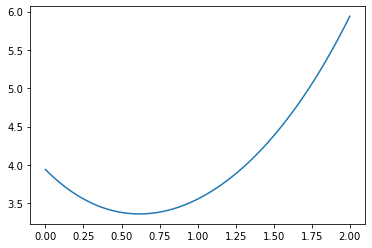

In [187]:
from scipy.sparse.linalg import spsolve
from scipy.sparse import lil_matrix, csr_matrix

def f(x):
    return x

L=2
N=100
x=linspace(0,L,N)

h=L/(N-1)
el1=1/h*array([[1,-1],[-1,1]])
el2=h/6*array([[2,1],[1,2]])
el=el1+el2

A=lil_matrix((N,N))
# boucle sur les elements
for k in range(N-1):
    ind=[k,k+1]
    #parcours des coeffs de la matrice elementaire
    for i in range(2):
        for j in range(2):
            A[ind[i],ind[j]]=A[ind[i],ind[j]]+el[i,j]
#print(A)
A=A.tocsr()
# assemblage du second membre
SM=h*0.5*(f(x-h/2)+f(x+h/2))
SM[0]=h*0.5*f(h/2)
SM[-1]=h*0.5*f(L-h/2)
#ajout de b0*Phi_i(0)+b1*Phi_i(L)
#Soit:
#ajout de b0*Phi_0(0)=b0 en première ligne
#ajout de b1*Phi_{N-1}(L)=b1 en dernière ligne

b0=2
b1=4

SM[0]+=b0
SM[-1]+=b1

U=spsolve(A,SM)
plot(x,U)

On cherche à approcher le problème,
$$
\begin {align}
&-u''(x)+u(x)=f(x), \quad x\in ]0,L[,\\
&u'(0)=-b_0,\\
&u(L)=0.
\end {align}
$$
où la fonction $f$ est donnée et la constante $b_0$ est quelconque fixée. La formulation faible s'écrit pour un espace $V$ qui assure que les intégrales suivantes ont un sens et que 
$$
v(L)=0.
$$
$$
\left (\mathcal V\right ) \begin {cases}
\text{Trouver } u\in V\text{ tel que }\forall v\in V\\
\int_0^L u'(x)v'(x)\,dx+\int_0^L u(x)v(x)\,dx=\int_0^L f(x)v(x)\,dx+b_0v(0).
\end {cases}
$$
On notera $a(u,v)$ l'expression de la forme bilinéaire intervenant dans le membre de gauche de $\left (\mathcal V\right )$ et on notera $l(v)$ la forme linéaire intervenant dans le membre de droite de $\left (\mathcal V\right )$.
### Formulation faible approchée
On cherche à résoudre le problème approché en dimension finie,
$$
\left (\mathcal V_N\right ) \begin {cases}
\text{Trouver } u_N\in V_N\text{ tel que }\forall v\in V_N\\
\int_0^L u_N'(x)v'(x)\,dx+\int_0^L u_N(x)v(x)\,dx=\int_0^L f(x)v(x)\,dx+b_0v(0),
\end {cases}
$$
où $V_N$ est de dimension finie et défini par 
$$
V_N=\{ v\in \mathcal C^0(]0,L[)\text{ tel que }v_{|[x_i,x_{i+1}]  }   \in \mathbb P_1,~\forall 0\le i< N-1 \text{ et }v(L)=0\},
$$
avec $x_i=ih$ où $h$ est le pas de la subdivision uniforme de $[0,L]$, soit $h=\frac L {N}$. En particulier $x_{N-1}=L-h$.
### Base de l'espace d'approximation
On construit une base de $V_N$ à l'aide des fonctions chapeaux suivantes $\Phi_i$ pour $0\le i<N$,
$$
\begin {cases}
\Phi_i(x)=\frac {x-x_{i-1}} h \text { si }x_{i-1}\le x\le x_{i},\\
\Phi_i(x)=\frac {-x+x_{i+1}} h \text { si }x_{i}\le x\le x_{i+1},\\
\Phi_i(x)=0\text { sinon }.
\end {cases}
$$
On vérifie aisément que $\{\Phi_i \}_{0\le i< N}$ forme une famille libre et génératrice de $V_N$:
$$
\forall v\in V_N,\quad v=\sum_{i=0}^{N-1}v(x_i)\Phi_i.
$$

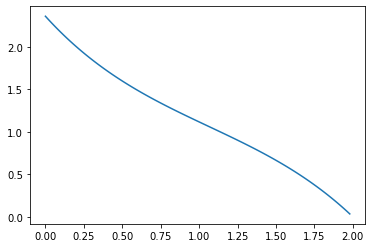

In [188]:



from scipy.sparse.linalg import spsolve
from scipy.sparse import lil_matrix, csr_matrix

def f(x):
    return x

L=2
N=100
h=L/N
x=linspace(0,L-h,N)


el1=1/h*array([[1,-1],[-1,1]])
el2=h/6*array([[2,1],[1,2]])
el=el1+el2

A=lil_matrix((N,N))
# boucle sur les elements (sauf le dernier)
for k in range(N-1):
    ind=[k,k+1]
    #parcours des coeffs de la matrice elementaire
    for i in range(2):
        for j in range(2):
            A[ind[i],ind[j]]=A[ind[i],ind[j]]+el[i,j]
k=N-1
A[k,k]+=el[0,0]
#print(A)
A=A.tocsr()
# assemblage du second membre
SM=h*0.5*(f(x-h/2)+f(x+h/2))
SM[0]=h*0.5*f(h/2)

#ajout de b0*Phi_i(0)+b1*Phi_i(L)
#Soit:
#ajout de b0*Phi_0(0)=b0 en première ligne
#ajout de b1*Phi_{N-1}(L)=b1 en dernière ligne

b0=2


SM[0]+=b0


U=spsolve(A,SM)
plot(x,U)

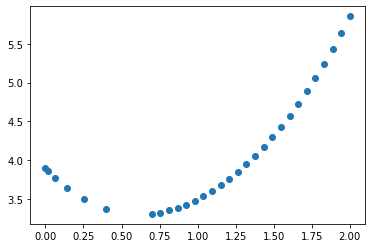

In [200]:
# On reprend le problème avec CL de Neumann -b0 et b1 et on choisit 
# de faire une grille non uniforme

from scipy.sparse.linalg import spsolve
from scipy.sparse import lil_matrix, csr_matrix

def f(x):
    return x

L=2
N=30
M=int(N/5)
x0=linspace(0,sqrt(L/5),M)
x=zeros(N)
x[:M]=x0**2
hunif=0.8*L/(N-M)
x[M:]=linspace(sqrt(L/5)+hunif,L,N-M)
h=zeros(N)
h[:-1]=x[1:]-x[:-1]
#plot(x)


el1=array([[1,-1],[-1,1]])
el2=1/6*array([[2,1],[1,2]])


A=lil_matrix((N,N))
# boucle sur les elements
for k in range(N-1):
    el=el1/h[k]+h[k]*el2
    ind=[k,k+1]
    #parcours des coeffs de la matrice elementaire
    for i in range(2):
        for j in range(2):
            A[ind[i],ind[j]]=A[ind[i],ind[j]]+el[i,j]
#print(A)
A=A.tocsr()
# assemblage du second membre
SM=zeros(N)
SM[:-1]=h[:-1]*0.5*(f(x[:-1]-h[:-1]/2)+f(x[:-1]+h[1:]/2))
SM[0]=h[0]*0.5*f(h[0]/2)
SM[-1]=h[-1]*0.5*f(L-h[-1]/2)
#ajout de b0*Phi_i(0)+b1*Phi_i(L)
#Soit:
#ajout de b0*Phi_0(0)=b0 en première ligne
#ajout de b1*Phi_{N-1}(L)=b1 en dernière ligne

b0=2
b1=4

SM[0]+=b0
SM[-1]+=b1

U=spsolve(A,SM)
plot(x,U,'o')



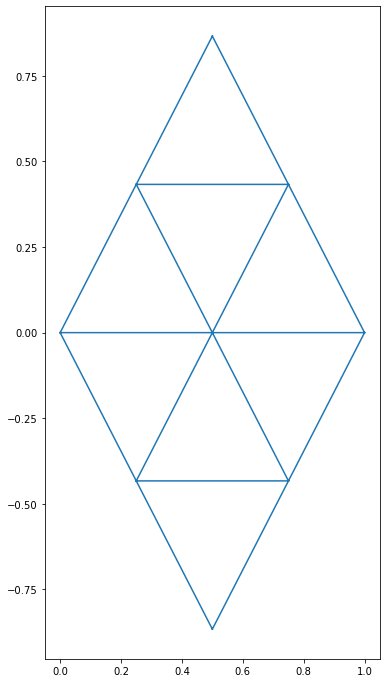

In [202]:
import matplotlib.tri as mptri
points = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2],  [0.5, -np.sqrt(3)/2]])
triang=mptri.Triangulation(points[:,0], points[:,1])

triang=mptri.Triangulation(points[:,0], points[:,1])
refiner = mptri.UniformTriRefiner(triang)
tri3 = refiner.refine_triangulation(subdiv=1)
plt.subplots(figsize=(6, 12))
plt.triplot(tri3.x, tri3.y, tri3.triangles);

In [203]:
print(tri3.x)
print(tri3.y)
print(tri3.triangles)

[0.   1.   0.5  0.5  0.75 0.75 0.5  0.25 0.25]
[ 0.         0.         0.8660254 -0.8660254 -0.4330127  0.4330127
  0.         0.4330127 -0.4330127]
[[0 6 7]
 [1 5 6]
 [2 7 5]
 [6 5 7]
 [3 4 8]
 [1 6 4]
 [0 8 6]
 [4 6 8]]


In [204]:
from scipy.sparse.linalg import spsolve
from scipy.sparse import lil_matrix, csr_matrix

tri3 = refiner.refine_triangulation(subdiv=8)

def matrice_rig(pt):
    surface=np.linalg.norm(np.cross(pt[2]-pt[0], pt[1]-pt[0]))*0.5
    #print(surface)
    B=np.array([[pt[2,1]-pt[0,1],pt[0,1]-pt[1,1]],[pt[0,0]-pt[2,0],pt[1,0]-pt[0,0]]])
    BtB=B.T@B
    nabphi=np.array([[-1,-1],[1,0],[0,1]])
    return nabphi@BtB@nabphi.T*0.25/surface

#nbre de triangles
nt=np.size(tri3.triangles,0)
#nbre ddl (sommets)
nddl=np.size(tri3.x,0)
print(nddl)
A =lil_matrix((nddl, nddl))
for tr in range(nt):
    S=tri3.triangles[tr]
    pt=np.zeros((3,2))
    pt[:,0]=tri3.x[S]
    pt[:,1]=tri3.y[S]
    el=matrice_rig(pt)
    for i in range(3):
        for j in range(3):
            A[S[j],S[i]]+=el[i,j]
A=A.tocsr()

66049


[-5.46323695e-06 -1.07561034e-06 -3.26943485e-06 ... -9.89063152e-07
 -1.14392056e-06 -1.04108556e-06]
-3.903127820947816e-17


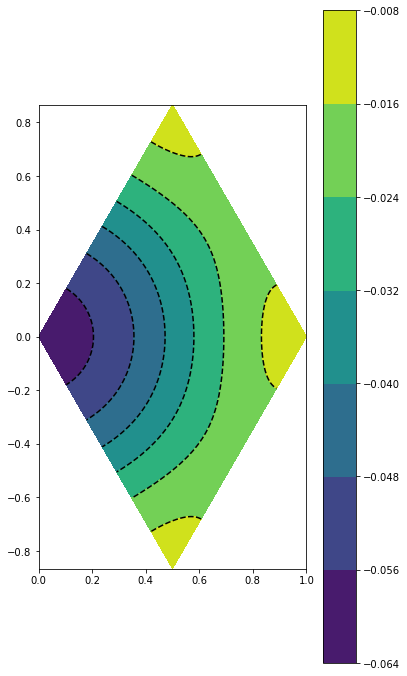

In [205]:
#calcul du second membre
def f(coord):
    x=coord[0]
    y=coord[1]
    return x**2+y**2
#parcours des elements
SM=zeros(nddl)
for tr in range(nt):
    S=tri3.triangles[tr]
    pt=np.zeros((3,2))
    pt[:,0]=tri3.x[S]
    pt[:,1]=tri3.y[S]
    surface=np.linalg.norm(np.cross(pt[2]-pt[0], pt[1]-pt[0]))*0.5
    for i in range(3):
            G=pt[0,:]+pt[1,:]+pt[2,:]
            G/=3
            SM[S[i]]+=f(G)*surface/3
            
SM-=SM@ones(nddl)/nddl
print(SM)
print(SM@ones(nddl))
u=spsolve(A,SM)
fig1, ax1 = plt.subplots(figsize=(6, 12))
ax1.set_aspect('equal')
tcf = ax1.tricontourf(tri3, u)
fig1.colorbar(tcf)
ax1.tricontour(tri3, u, colors='k')

Text(0.5, 1.0, 'tricontouring')

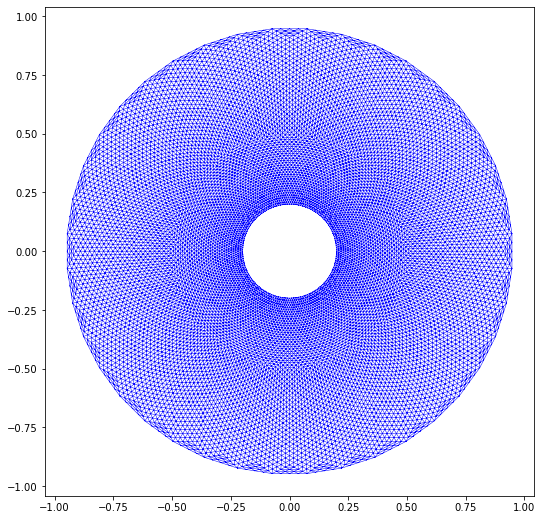

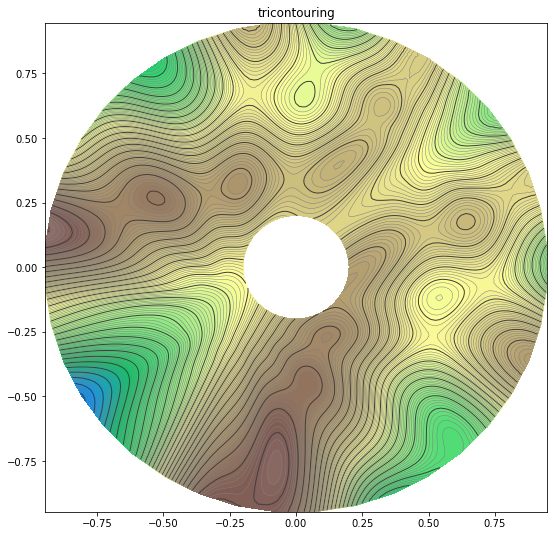

In [242]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.tri as tri


# ----------------------------------------------------------------------------
# Analytical test function
# ----------------------------------------------------------------------------
def function_z(x, y):
    r1 = np.sqrt((0.5 - x)**2 + (0.5 - y)**2)
    theta1 = np.arctan2(0.5 - x, 0.5 - y)
    r2 = np.sqrt((-x - 0.2)**2 + (-y - 0.2)**2)
    theta2 = np.arctan2(-x - 0.2, -y - 0.2)
    z = -(2 * (np.exp((r1 / 10)**2) - 1) * 30. * np.cos(7. * theta1) +
          (np.exp((r2 / 10)**2) - 1) * 30. * np.cos(11. * theta2) +
          0.7 * (x**2 + y**2))
    return z#(np.max(z) - z) / (np.max(z) - np.min(z))

# ----------------------------------------------------------------------------
# Creating a Triangulation
# ----------------------------------------------------------------------------
# First create the x and y coordinates of the points.
n_angles = 40
n_radii = 20
min_radius = 0.2
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi / n_angles

x = (radii * np.cos(angles)).flatten()
y = (radii * np.sin(angles)).flatten()
z = function_z(x, y)

# Now create the Triangulation.
# (Creating a Triangulation without specifying the triangles results in the
# Delaunay triangulation of the points.)
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1),
                         y[triang.triangles].mean(axis=1))
                < min_radius)

# ----------------------------------------------------------------------------
# Refine data
# ----------------------------------------------------------------------------
refiner = tri.UniformTriRefiner(triang)
tri_refi, z_test_refi = refiner.refine_field(z, subdiv=2)

# ----------------------------------------------------------------------------
# Plot the solution
# ----------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(9, 9))
ax.set_aspect('equal')
ax.triplot(tri_refi, lw=0.5, color='blue')

fig, ax = plt.subplots(figsize=(9, 9))
levels = np.arange(-3., 2., 0.025)
ax.tricontourf(tri_refi, z_test_refi, levels=levels, cmap='terrain')
ax.tricontour(tri_refi, z_test_refi, levels=levels,
              colors=['0.25', '0.5', '0.5', '0.5', '0.5'],
              linewidths=[1.0, 0.5, 0.5, 0.5, 0.5])

ax.set_title("tricontouring")


12890
6.938893903907228e-17


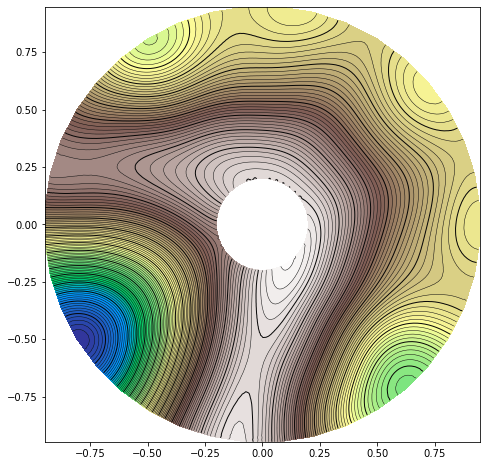

In [236]:
def matrice_rig(pt):
    surface=np.linalg.norm(np.cross(pt[2]-pt[0], pt[1]-pt[0]))*0.5
    #print(surface)
    B=np.array([[pt[2,1]-pt[0,1],pt[0,1]-pt[1,1]],[pt[0,0]-pt[2,0],pt[1,0]-pt[0,0]]])
    BtB=B.T@B
    nabphi=np.array([[-1,-1],[1,0],[0,1]])
    return nabphi@BtB@nabphi.T*0.25/surface#+(1e-3)*diag(ones(3))
tri3=tri_refi
#nbre de triangles
nt=np.size(tri3.triangles,0)
#nbre ddl (sommets)
nddl=np.size(tri3.x,0)
print(nddl)
A =lil_matrix((nddl, nddl))
for tr in range(nt):
    S=tri3.triangles[tr]
    pt=np.zeros((3,2))
    pt[:,0]=tri3.x[S]
    pt[:,1]=tri3.y[S]
    el=matrice_rig(pt)
    for i in range(3):
        for j in range(3):
            A[S[j],S[i]]+=el[i,j]
A=A.tocsr()
SM=zeros(nddl)
for tr in range(nt):
    S=tri3.triangles[tr]
    pt=np.zeros((3,2))
    pt[:,0]=tri3.x[S]
    pt[:,1]=tri3.y[S]
    surface=np.linalg.norm(np.cross(pt[2]-pt[0], pt[1]-pt[0]))*0.5
    for i in range(3):
            G=pt[0,:]+pt[1,:]+pt[2,:]
            G/=3
            SM[S[i]]+=function_z(G[0], G[1])*surface/3
            
SM-=SM@ones(nddl)/nddl
#print(SM)
print(SM@ones(nddl))
u=spsolve(A,SM)
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
#ax.triplot(triang, lw=0.5, color='white')

levels = np.arange(min(u), max(u), 0.0015)
ax.tricontourf(tri3, u, levels=levels, cmap='terrain')
ax.tricontour(tri3, u, levels=levels,
              colors=['0.025', '0.05', '0.05', '0.05', '0.05'],
              linewidths=[1.0, 0.5, 0.5, 0.5, 0.5])


In [234]:
print(min(u),max(u))

-0.019886163700710554 0.010141574327497996
